In [33]:
import pandas as pd
import numpy as np

df = pd.read_csv("Raw Data.csv")
df.head()


,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2),Absolute acceleration (m/s^2)
0,0.020825,0.772462,0.656213,0.251085,1.044201
1,0.030795,0.826775,0.652397,-0.139812,1.062415
2,0.040764,0.847667,0.728472,-0.280412,1.152320
3,0.050734,0.780731,0.781359,-0.089189,1.108160
4,0.060703,0.762355,0.704453,0.085450,1.041509


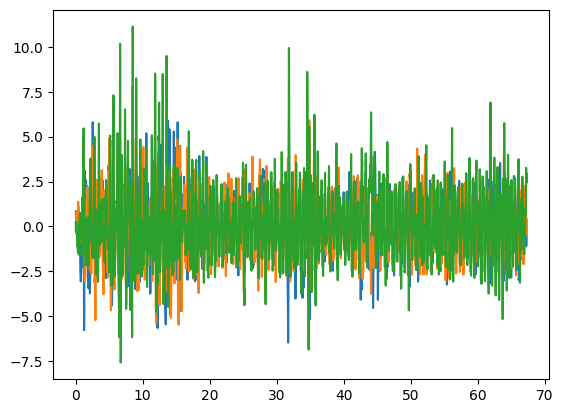

In [34]:
import matplotlib.pyplot as plt

#Kuvaaja

plt.plot(df['Time (s)'], df['Linear Acceleration x (m/s^2)'])
plt.plot(df['Time (s)'], df['Linear Acceleration y (m/s^2)'])
plt.plot(df['Time (s)'], df['Linear Acceleration z (m/s^2)'])
plt.show()

In [35]:
from scipy.signal import butter, filtfilt
def butter_lowpass_filter(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y
def butter_highpass_filter(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    y = filtfilt(b, a, data)
    return y  

In [36]:
#Filtterien parametrit

T = df['Time (s)'][len(df['Time (s)'])-1] - df['Time (s)'][0] #koko datan pituus
n = len(df['Time (s)']) #Datapisteiden lukumäärä
fs = n/T #näytteenottotaajuus (olettaen vakioksi)
nyq = fs/2 #Nyqvistin taajuus
order = 3 #Kertaluku
cutoff = 1/(0.2) #Cutoff taajuus
print(T, n, fs, nyq, order,cutoff)

67.28533475045 6750 100.31903720230589 50.159518601152946 3 5.0


In [37]:
#Kokeillaan suodatinta
df['filter_a_x'] = butter_lowpass_filter(df['Linear Acceleration x (m/s^2)'], cutoff, fs, nyq, order)
df['filter_a_y'] = butter_lowpass_filter(df['Linear Acceleration y (m/s^2)'], cutoff, fs, nyq, order)
df['filter_a_z'] = butter_lowpass_filter(df['Linear Acceleration z (m/s^2)'], cutoff, fs, nyq, order)


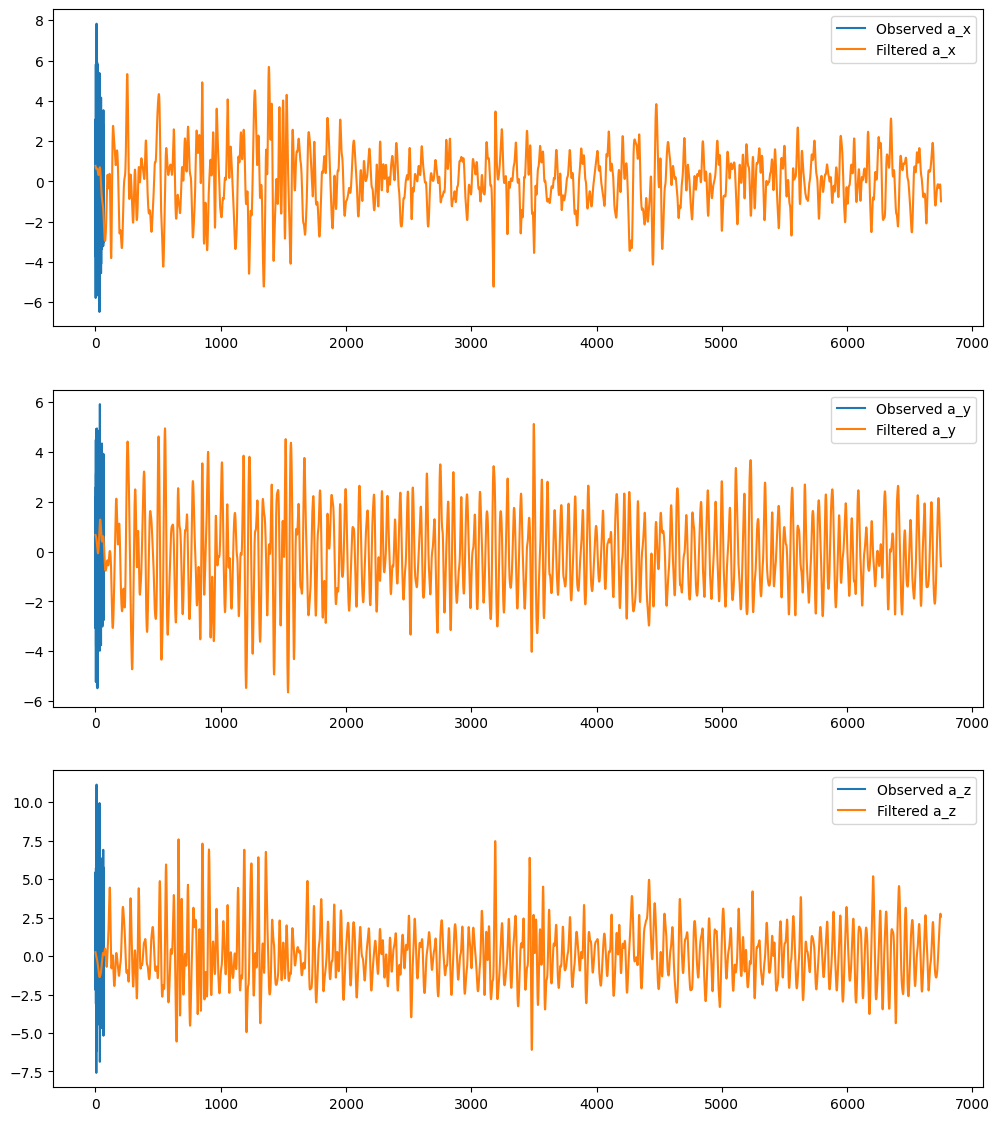

In [38]:
#Piirretään kuva

plt.figure(figsize=(12,14))
plt.subplot(3,1,1)
plt.plot(df['Time (s)'], df['Linear Acceleration x (m/s^2)'])
plt.plot(df['filter_a_x'])
plt.legend(['Observed a_x', 'Filtered a_x'])

plt.subplot(3,1,2)
plt.plot(df['Time (s)'], df['Linear Acceleration y (m/s^2)'])
plt.plot(df['filter_a_y'])
plt.legend(['Observed a_y', 'Filtered a_y'])

plt.subplot(3,1,3)
plt.plot(df['Time (s)'], df['Linear Acceleration z (m/s^2)'])
plt.plot(df['filter_a_z'])
plt.legend(['Observed a_z', 'Filtered a_z'])